In [1]:
from utils.binaries import *
from utils.plotting import *

07:48:25 [INFO] utils          -- (  +754ms) -- import logging
07:48:25 [INFO] utils.binaries -- (  +146ms) -- import numpy as np
07:48:25 [INFO] utils.binaries -- (    +6ms) -- import uncertainties
07:48:25 [INFO] utils.binaries -- (  +283ms) -- import pandas as pd
07:48:25 [INFO] utils.binaries -- (    +3ms) -- import binaries.tools as tools
07:48:25 [INFO] utils.plotting -- (  +401ms) -- import matplotlib.pyplot as plt
07:48:26 [INFO] utils.plotting -- (  +535ms) -- import seaborn as so
07:48:26 [DBUG] utils.plotting -- (   +12ms) -- font size set to 9.5
07:48:26 [DBUG] utils.plotting -- (    +1ms) -- label size set to 13.0
07:48:26 [DBUG] utils.plotting -- (    +1ms) -- figure size set to [6.6, 3.3]
07:48:26 [DBUG] utils.plotting -- (    +1ms) -- markersize set to 2.0
07:48:26 [DBUG] utils.plotting -- (    +1ms) -- usetex set to False
07:48:26 [INFO] utils.plotting -- (    +4ms) -- import plotting.tools as plot


In [2]:
fmt = {
    'wcd' : np.dtype([('timestamp', 'I'), 
                    ('t1_latch_bin', 'h'), 
                    ('baseline', ('H', 3)), 
                    ('traces', ('h', (3, 2048)))]),
    'ssd' : np.dtype([('timestamp', 'I'), 
                    ('t1_latch_bin', 'h'),
                    ('baseline', 'H'), 
                    ('trace', ('h', 2048))])
}

In [47]:
def read(file_path, f) -> np.ndarray :

    # buffer = bz2.BZ2File(file_path).read()        
    return np.fromfile(file_path, fmt[f])

In [4]:
data = read('/cr/data02/AugerPrime/UUB/UubRandoms/2023_03/Constanza/randoms0000.wcd')

In [22]:
print(len(data['traces']))
print(t1s.sum())

5000
14


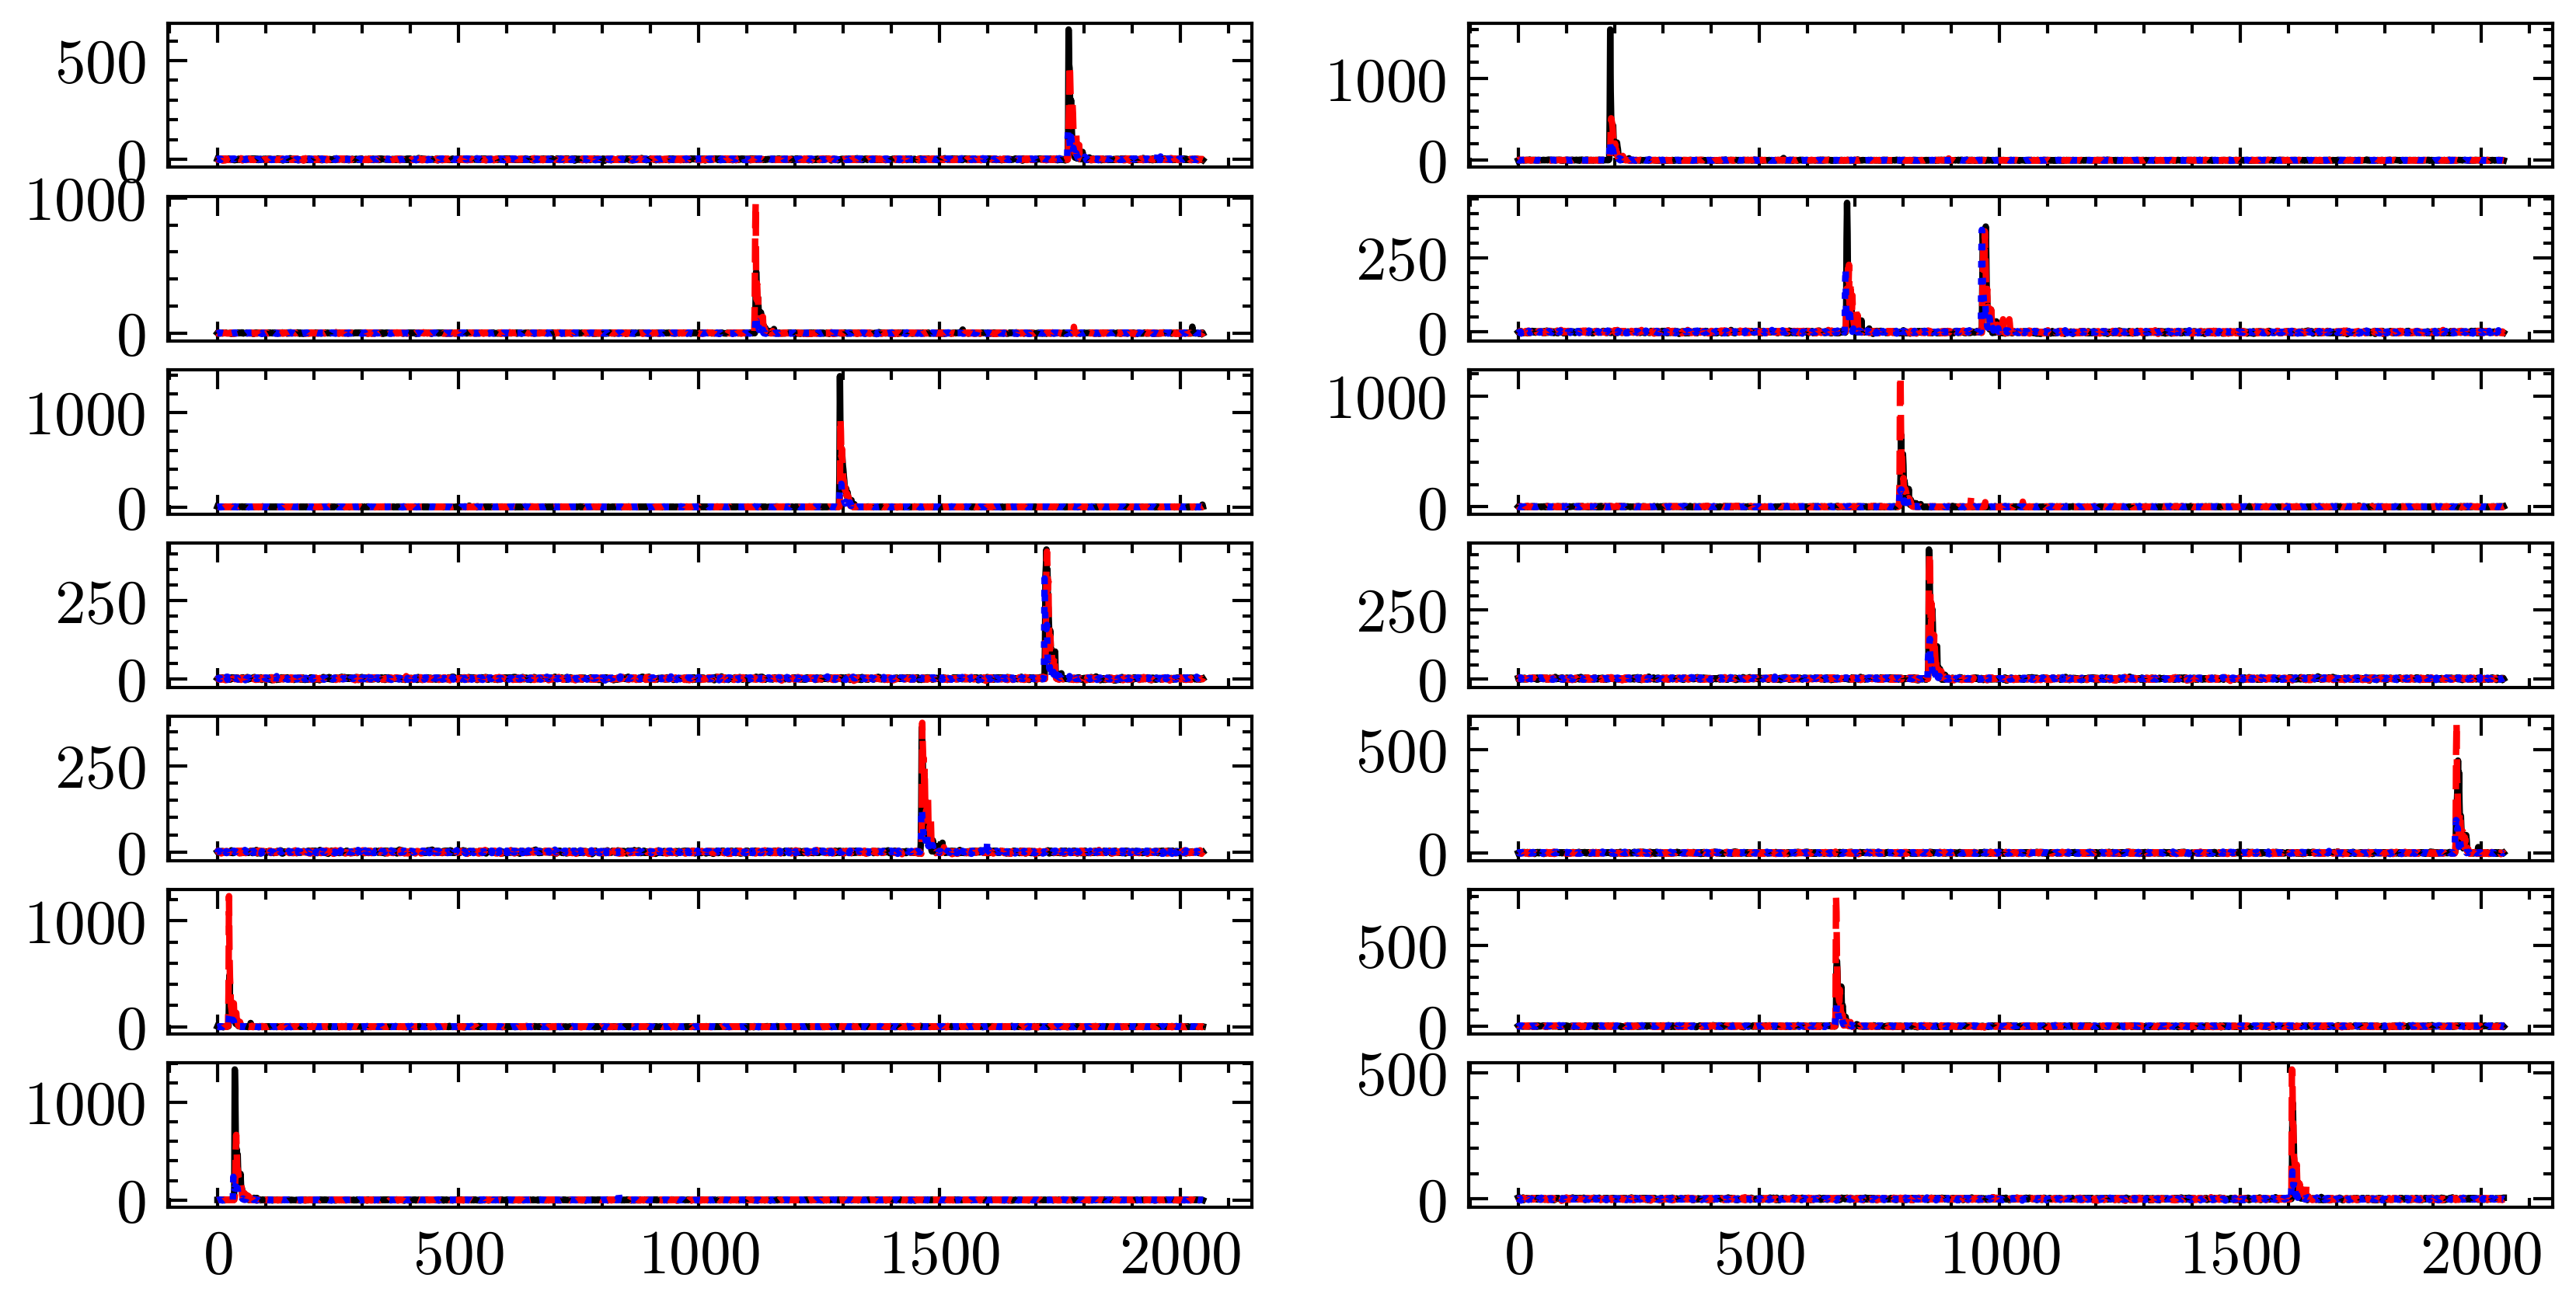

In [24]:
t1s = (data['t1_latch_bin'] != -1)
fig, axes = plt.subplots(7, 2, sharex=True)

for ax, trace in zip(axes.flat, data['traces'][t1s]):

    ax.plot(range(2048), trace[0])
    ax.plot(range(2048), trace[1])
    ax.plot(range(2048), trace[2])

In [48]:
t, rates = [], []

for i in tools.ProgressBar(range(1660), newline=False):
    data = read(f'/cr/data02/AugerPrime/UUB/UubRandoms/2023_03/Constanza/randoms{i:04}.ssd', 'ssd')
    t.append(np.mean(data['timestamp']))
    rates.append((data['t1_latch_bin'] != -1).sum() / (len(data) * 2048))


/cr/users/filip/.venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/cr/users/filip/.venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


running: 1660/1660 [********************] || 00:00:52>00:00:00,        31.53 it/s


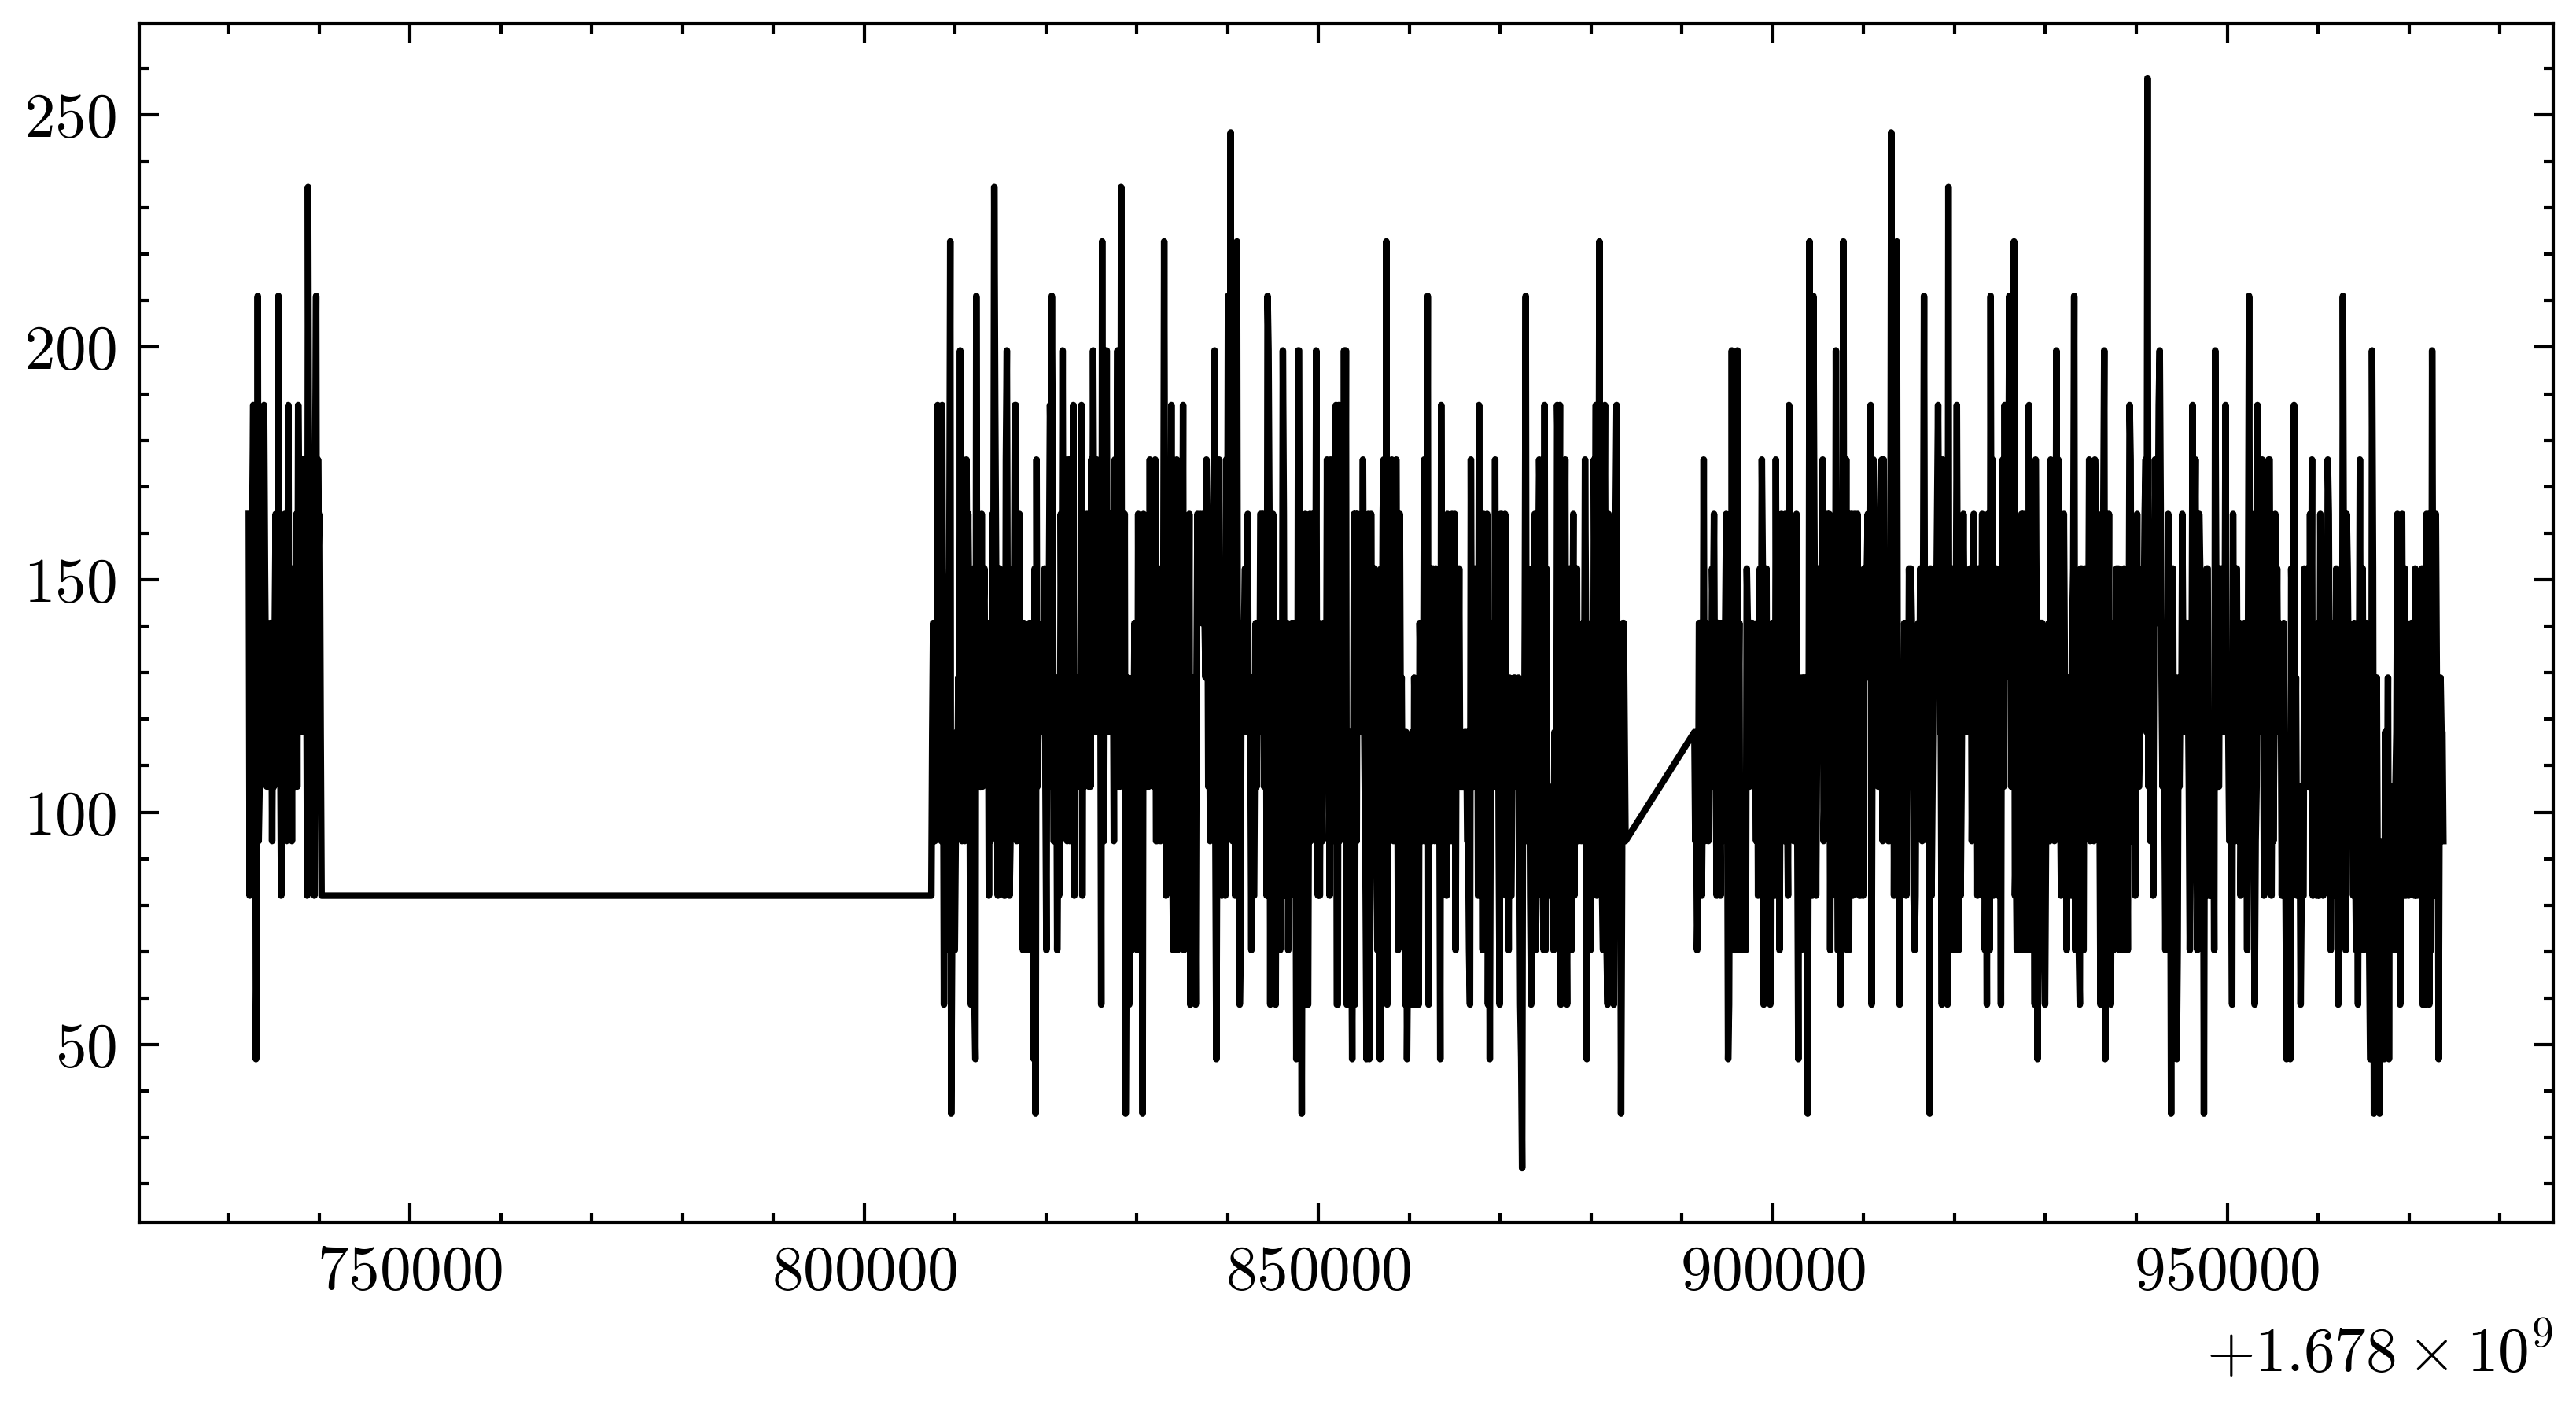

In [50]:
sort = np.argsort(t)
t = np.array(t)[sort]
rates = np.array(rates)[sort]


plt.plot(t, rates / (5000 * 2048 * 8.33e-9))

In [44]:
print(data['t1_latch_bin'])

[-1  0 -1 ... -1 -3  1]


In [52]:
np.mean(rates / (5000 * 2048 * 8.33e-9))

121.07629196256815

In [66]:
info = np.dstack([t, rates, rates / (5000 * 2048 * 8.33e-9)])

In [71]:
print(info[0][:-6])

[[1.67873226e+09 1.40000000e+01 1.64128151e+02]
 [1.67873235e+09 7.00000000e+00 8.20640756e+01]
 [1.67873245e+09 1.10000000e+01 1.28957833e+02]
 ...
 [1.67897369e+09 1.00000000e+01 1.17234394e+02]
 [1.67897379e+09 8.00000000e+00 9.37875150e+01]
 [           nan 0.00000000e+00 0.00000000e+00]]


In [72]:
np.savetxt('/cr/data02/AugerPrime/UUB/UubRandoms/t1_rates/Constanza.txt', info[0][:-6], fmt='%i %i %.3f')

In [2]:
from utils.binaries import *
from utils.Auger.SD.UubRandoms import UubRandom

triggers = []

for file in tools.ProgressBar(UubRandom('Constanza', 'wcd')):
    triggers.append((file['t1_latch_bin'] != -1).sum())

running:    1/1660 [                    ] || 00:00:00>00:00:00,    171115.67 it/s
running:    2/1660 [                    ] || 00:00:02>00:36:07,         0.76 it/s
running:    3/1660 [                    ] || 00:00:05>00:47:37,         0.58 it/s
running:    4/1660 [                    ] || 00:00:07>00:53:19,         0.52 it/s
running:    5/1660 [                    ] || 00:00:10>00:57:16,         0.48 it/s
running:    6/1660 [                    ] || 00:00:13>01:00:35,         0.45 it/s
running:    7/1660 [                    ] || 00:00:15>01:02:38,         0.44 it/s
running:    8/1660 [                    ] || 00:00:18>01:03:53,         0.43 it/s
running:    9/1660 [                    ] || 00:00:21>01:04:43,         0.43 it/s
running:   10/1660 [                    ] || 00:00:23>01:05:14,         0.42 it/s
running:   11/1660 [                    ] || 00:00:26>01:05:43,         0.42 it/s
running:   12/1660 [                    ] || 00:00:28>01:06:03,         0.42 it/s
running:   13/16

KeyboardInterrupt: 

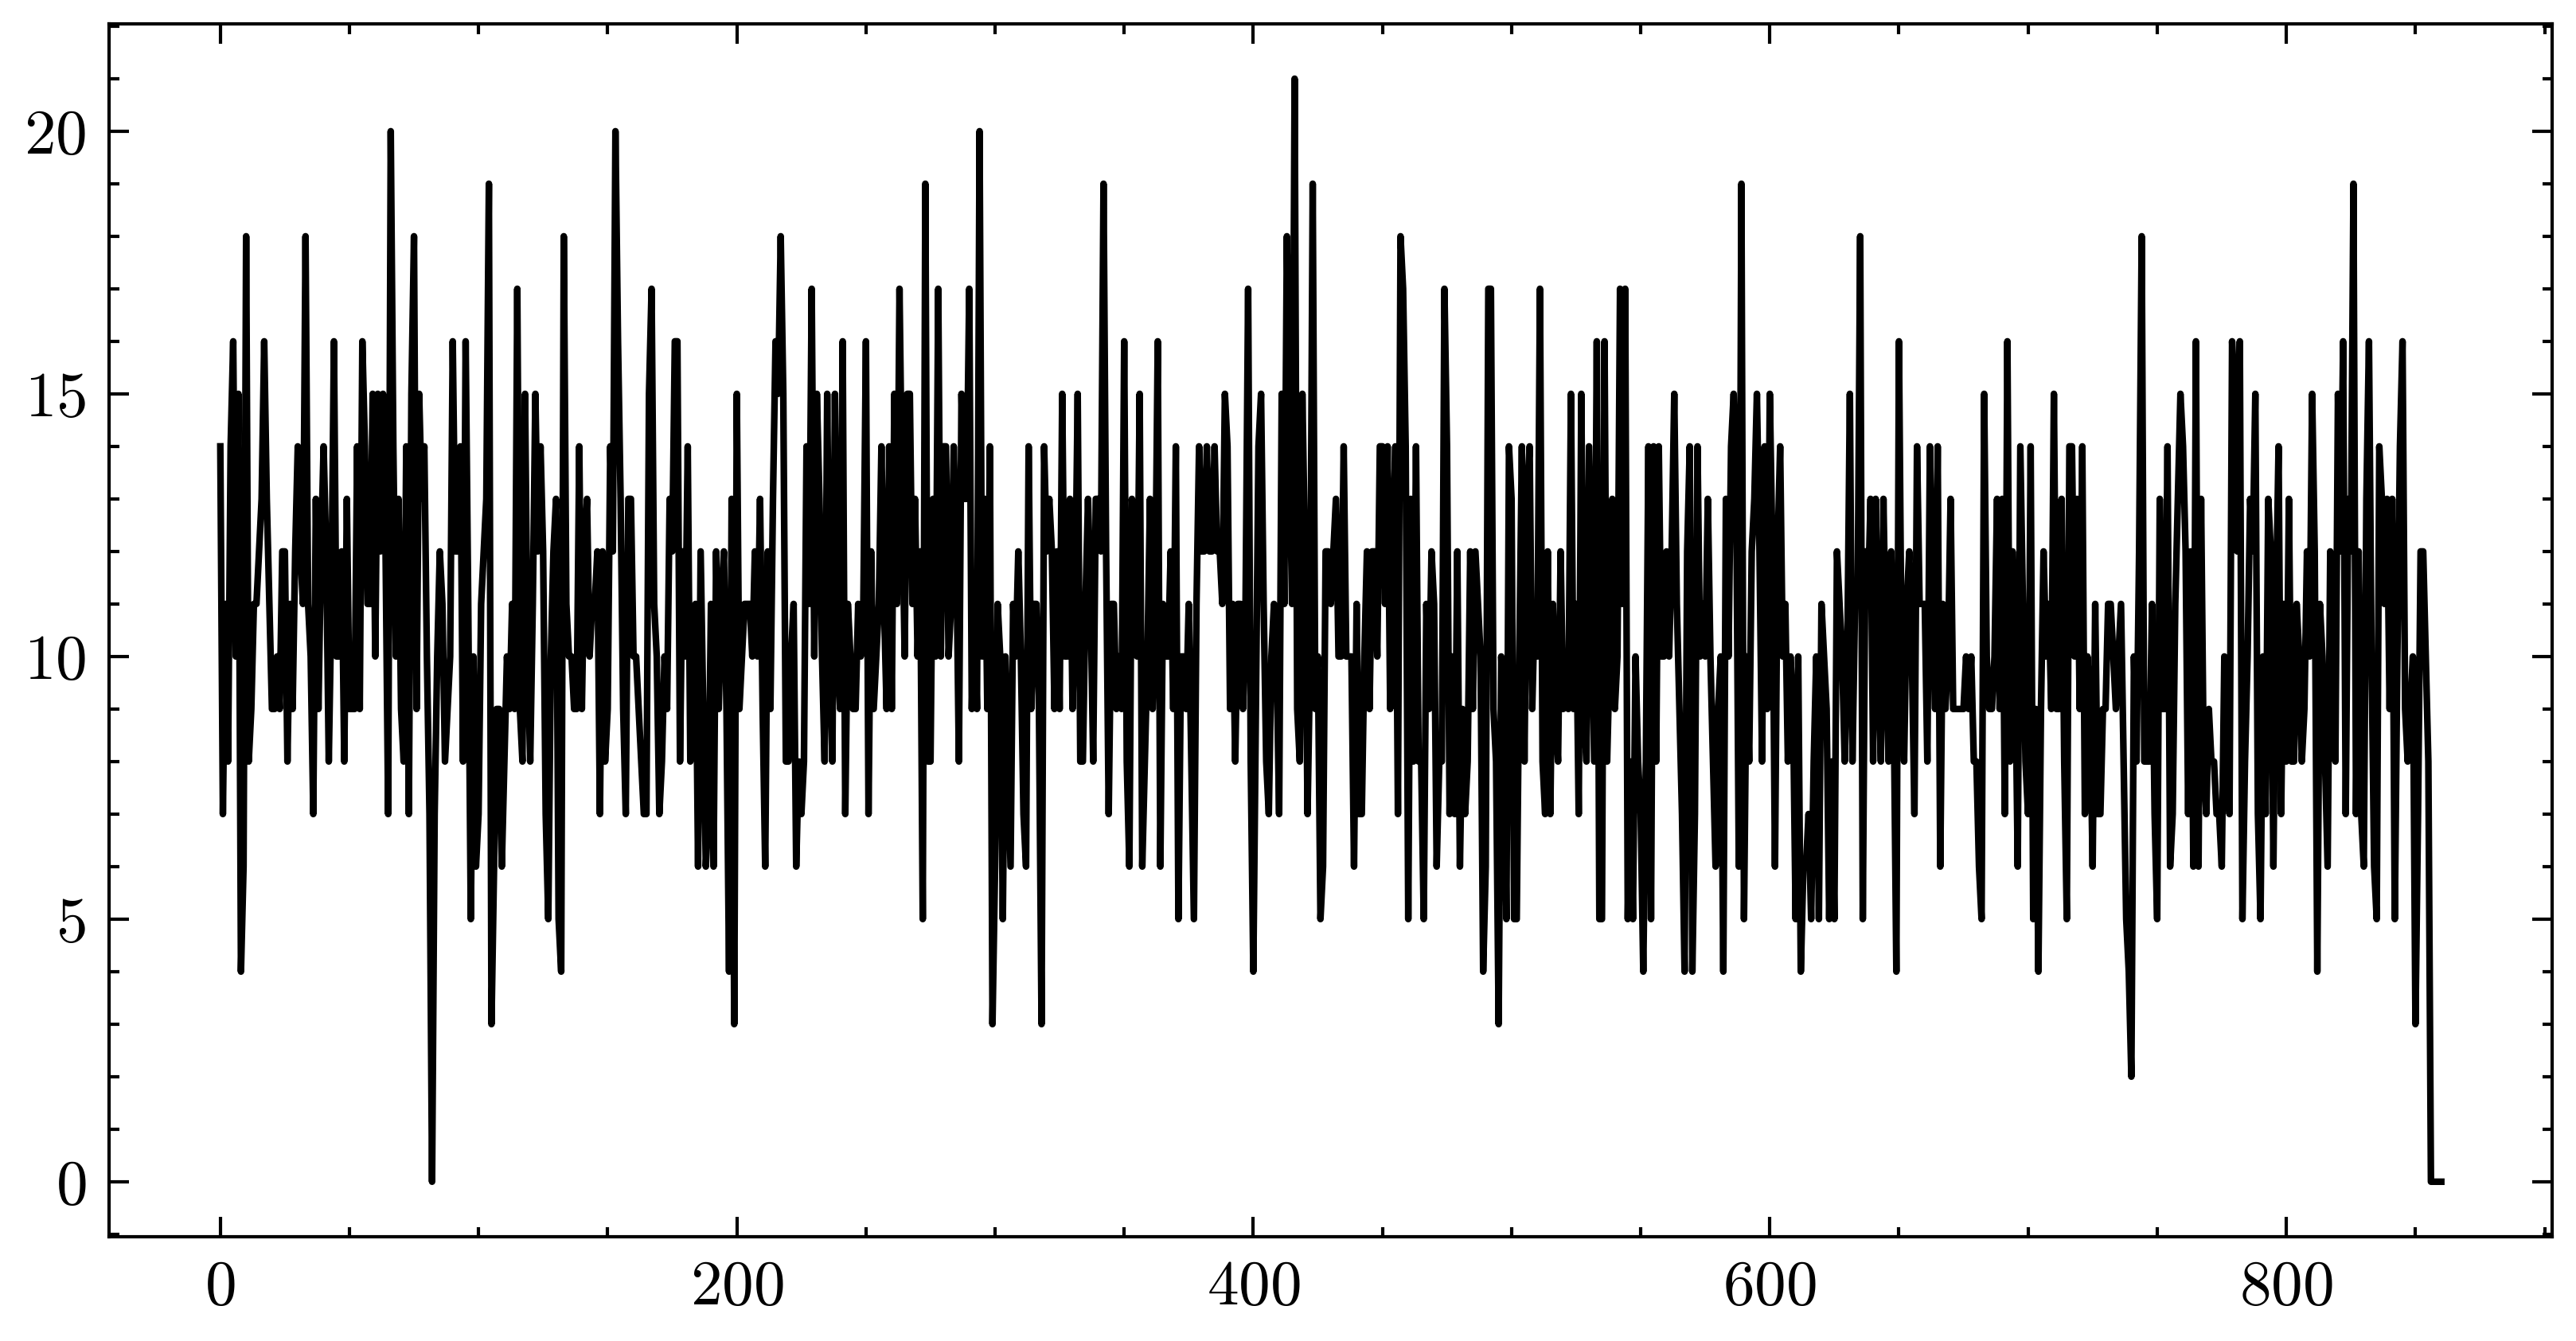

In [5]:
from utils.plotting import *

plt.plot(range(len(triggers)), triggers)